Single-threaded hashing performance with

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from IPython.display import Javascript
import getpass

In [2]:
password = None
if password is None:
    password = getpass.getpass()

In [3]:
!echo $password | sudo -S mount -t tmpfs -o size=20g ramdisk /mnt/ramdisk/
!cp -r ~/Documents/distros /mnt/ramdisk/

[sudo] password for fbdtemme: 

In [54]:
pwd = "/mnt/ramdisk"
max_threads = 4
iterations = 5
target = 'distros'

In [23]:
fs = !du -b $pwd/$target | grep -o "[0-9]*"
file_size = int(fs[0])

In [24]:
file_size

9599713280

In [25]:
# Disable cpu frequency scaling
!echo $password | sudo -S cpupower frequency-set -g performance

[sudo] password for fbdtemme: Setting cpu: 0
Setting cpu: 1
Setting cpu: 2
Setting cpu: 3
Setting cpu: 4
Setting cpu: 5
Setting cpu: 6
Setting cpu: 7


In [26]:
def parse_real_time(data: str):
    results = []
    match = re.search(R"real\s(\d+)m([\d.]+)s", data)
    minutes = float(match.group(1))
    seconds = float(match.group(2))
    return minutes * 60 + seconds

def parse_real_time_sequence(data: str):
    results = []
    for match in re.findall(R"real\s(\d+)m([\d.]+)s", data):
        print(match[0])
        print(match[1])
        minutes = float(match[0])
        seconds = float(match[1])
        results.append(minutes * 60 + seconds)
    return results

In [27]:
data = {}

In [28]:
def run_benchmark(name: str, use_threads:bool = True):
    duration = np.ndarray(shape=(iterations, max_threads))
    
    if use_threads:
        for t in range(1, max_threads+1):
            for i in range(0, iterations):
                result = !./benchmark.sh "{name}" "{pwd}" "{target}" "{t}"
                result_str = '\n'.join(result)
                print(f"-- iteration {i+1} | threads {t}\n{result_str}")
                duration[i, t-1] = parse_real_time(result_str)
    else:
        for i in range(0, iterations):
            t = 1
            result = !./benchmark.sh "{name}" "{pwd}" "{target}" "{t}"
            result_str = '\n'.join(result)
            print(f"-- iteration {i+1} | threads {t}\n{result_str}")
            duration[i, :] = parse_real_time(result_str)

    speed = file_size / duration
    mean = np.mean(speed, axis=0)
    std  = np.std(speed, axis=0)
    return (mean, std)

### mktorrent

In [29]:
mktorrent_data = run_benchmark("mktorrent")

-- iteration 1 | threads 1
rm: cannot remove '*.torrent': No such file or directory

real	0m13.346s
user	0m13.132s
sys	0m4.415s

-- iteration 2 | threads 1

real	0m13.647s
user	0m13.377s
sys	0m4.683s

-- iteration 3 | threads 1

real	0m13.467s
user	0m13.295s
sys	0m4.463s

-- iteration 4 | threads 1

real	0m13.617s
user	0m13.353s
sys	0m4.653s

-- iteration 5 | threads 1

real	0m13.569s
user	0m13.319s
sys	0m4.588s

-- iteration 1 | threads 2

real	0m6.991s
user	0m13.732s
sys	0m4.489s

-- iteration 2 | threads 2

real	0m7.017s
user	0m13.757s
sys	0m4.484s

-- iteration 3 | threads 2

real	0m7.078s
user	0m13.918s
sys	0m4.510s

-- iteration 4 | threads 2

real	0m7.065s
user	0m13.839s
sys	0m4.541s

-- iteration 5 | threads 2

real	0m7.064s
user	0m13.901s
sys	0m4.494s

-- iteration 1 | threads 3

real	0m5.131s
user	0m15.105s
sys	0m4.154s

-- iteration 2 | threads 3

real	0m5.102s
user	0m14.976s
sys	0m4.152s

-- iteration 3 | threads 3

real	0m4.893s
user	0m14.381s
sys	0m4.112s

-- iteration 4 

In [30]:
torrenttools_openssl_data = run_benchmark("torrenttools_openssl")

-- iteration 1 | threads 1

real	0m14.024s
user	0m13.416s
sys	0m4.497s

-- iteration 2 | threads 1

real	0m14.017s
user	0m13.352s
sys	0m4.455s

-- iteration 3 | threads 1

real	0m14.024s
user	0m13.322s
sys	0m4.621s

-- iteration 4 | threads 1

real	0m14.016s
user	0m13.393s
sys	0m4.602s

-- iteration 5 | threads 1

real	0m14.024s
user	0m13.386s
sys	0m4.653s

-- iteration 1 | threads 2

real	0m8.017s
user	0m13.826s
sys	0m4.739s

-- iteration 2 | threads 2

real	0m7.024s
user	0m13.679s
sys	0m4.657s

-- iteration 3 | threads 2

real	0m7.016s
user	0m13.692s
sys	0m4.652s

-- iteration 4 | threads 2

real	0m7.027s
user	0m13.610s
sys	0m4.673s

-- iteration 5 | threads 2

real	0m7.017s
user	0m13.612s
sys	0m4.518s

-- iteration 1 | threads 3

real	0m6.027s
user	0m15.663s
sys	0m4.368s

-- iteration 2 | threads 3

real	0m6.030s
user	0m15.371s
sys	0m4.247s

-- iteration 3 | threads 3

real	0m6.031s
user	0m16.613s
sys	0m4.393s

-- iteration 4 | threads 3

real	0m6.024s
user	0m15.206s
sys	0m4.273s

-

In [31]:
torrenttools_isal_data = run_benchmark("torrenttools_isal")

-- iteration 1 | threads 1

real	0m4.024s
user	0m3.780s
sys	0m2.213s

-- iteration 2 | threads 1

real	0m4.016s
user	0m3.786s
sys	0m2.149s

-- iteration 3 | threads 1

real	0m4.017s
user	0m3.742s
sys	0m2.130s

-- iteration 4 | threads 1

real	0m4.020s
user	0m3.743s
sys	0m2.141s

-- iteration 5 | threads 1

real	0m4.016s
user	0m3.732s
sys	0m2.120s

-- iteration 1 | threads 2

real	0m3.021s
user	0m3.875s
sys	0m2.132s

-- iteration 2 | threads 2

real	0m3.020s
user	0m3.846s
sys	0m2.087s

-- iteration 3 | threads 2

real	0m3.018s
user	0m4.025s
sys	0m2.121s

-- iteration 4 | threads 2

real	0m3.018s
user	0m3.878s
sys	0m2.115s

-- iteration 5 | threads 2

real	0m3.018s
user	0m3.865s
sys	0m2.132s

-- iteration 1 | threads 3

real	0m3.022s
user	0m4.748s
sys	0m2.152s

-- iteration 2 | threads 3

real	0m3.028s
user	0m4.521s
sys	0m2.174s

-- iteration 3 | threads 3

real	0m3.030s
user	0m4.523s
sys	0m2.169s

-- iteration 4 | threads 3

real	0m3.028s
user	0m4.630s
sys	0m2.182s

-- iteration 5 | thr

In [32]:
imdl_data = run_benchmark("imdl", use_threads=False)

-- iteration 1 | threads 1

real	0m20.249s
user	0m18.513s
sys	0m1.510s

-- iteration 2 | threads 1

real	0m20.215s
user	0m18.395s
sys	0m1.651s

-- iteration 3 | threads 1

real	0m20.296s
user	0m18.571s
sys	0m1.557s

-- iteration 4 | threads 1

real	0m20.125s
user	0m18.316s
sys	0m1.589s

-- iteration 5 | threads 1

real	0m22.633s
user	0m19.959s
sys	0m2.369s



In [33]:
dottorrent_cli_data = run_benchmark("dottorrent-cli", use_threads=False)

-- iteration 1 | threads 1

real	0m23.384s
user	0m16.009s
sys	0m6.883s

-- iteration 2 | threads 1

real	0m17.757s
user	0m12.868s
sys	0m4.711s

-- iteration 3 | threads 1

real	0m23.064s
user	0m15.684s
sys	0m6.897s

-- iteration 4 | threads 1

real	0m28.862s
user	0m19.149s
sys	0m9.052s

-- iteration 5 | threads 1

real	0m24.971s
user	0m16.883s
sys	0m7.616s



In [34]:
pyrocore_data = run_benchmark("pyrocore", use_threads=False)

-- iteration 1 | threads 1

real	0m16.854s
user	0m13.226s
sys	0m3.319s

-- iteration 2 | threads 1

real	0m18.143s
user	0m13.995s
sys	0m3.789s

-- iteration 3 | threads 1

real	0m16.476s
user	0m12.915s
sys	0m3.267s

-- iteration 4 | threads 1

real	0m16.151s
user	0m12.834s
sys	0m3.032s

-- iteration 5 | threads 1

real	0m17.789s
user	0m13.820s
sys	0m3.625s



In [35]:
transmission_create_data = run_benchmark("transmission-create", use_threads=False)

-- iteration 1 | threads 1

real	0m14.004s
user	0m11.487s
sys	0m1.973s

-- iteration 2 | threads 1

real	0m13.504s
user	0m11.100s
sys	0m1.803s

-- iteration 3 | threads 1

real	0m13.004s
user	0m10.909s
sys	0m1.829s

-- iteration 4 | threads 1

real	0m14.505s
user	0m11.718s
sys	0m2.163s

-- iteration 5 | threads 1

real	0m14.004s
user	0m11.188s
sys	0m2.116s



In [43]:
py3createtorrent_data = run_benchmark("py3createtorrent", use_threads=False)

-- iteration 1 | threads 1
rm: cannot remove '*.torrent': No such file or directory

real	0m15.737s
user	0m12.204s
sys	0m3.208s

-- iteration 2 | threads 1

real	0m15.760s
user	0m12.390s
sys	0m3.099s

-- iteration 3 | threads 1

real	0m14.766s
user	0m11.846s
sys	0m2.669s

-- iteration 4 | threads 1

real	0m15.562s
user	0m12.233s
sys	0m3.037s

-- iteration 5 | threads 1

real	0m13.559s
user	0m11.232s
sys	0m2.130s



In [44]:
benchmark_data = {
    "mktorrent": mktorrent_data, 
    "imdl": imdl_data,
    "dottorrent-cli": dottorrent_cli_data,
    "pyrocore": pyrocore_data,
    "transmission-create": transmission_create_data,
    "py3createtorrent" : py3createtorrent_data,
    "torrenttools (OpenSSL)": torrenttools_openssl_data,
    "torrenttools (ISA-L)": torrenttools_isal_data
}

In [45]:
programs = list(benchmark_data.keys())
threads = list(range(1, max_threads+1))
index = pd.MultiIndex.from_product((threads, programs), names=["threads", "programs"])

speed_mean_data = {}
speed_stddev_data = {}
for program, data in benchmark_data.items():
    speed_mean_data[program] = data[0]
    speed_stddev_data[program] = data[1]
    

speed_mean = pd.DataFrame(speed_mean_data).stack()
speed_stddev = pd.DataFrame(speed_stddev_data).stack()

In [46]:
df = pd.DataFrame()
df["speed_mean"], df["speed_stddev"] = speed_mean / 1e6, speed_stddev / 1e6
df.index = index

In [47]:
df

speed_mean  speed_stddev
threads programs                                         
1       mktorrent                709.602351      5.802996
        imdl                     464.620127     20.279423
        dottorrent-cli           416.880611     68.565213
        pyrocore                 563.071760     24.929455
        transmission-create      696.381692     26.043567
        p3createtorrent          638.823061     37.701735
        torrenttools (OpenSSL)   684.666853      0.180102
        torrenttools (ISA-L)    2388.821701      1.825233
2       mktorrent               1363.045272      6.452082
        imdl                     464.620127     20.279423
        dottorrent-cli           416.880611     68.565213
        pyrocore                 563.071760     24.929455
        transmission-create      696.381692     26.043567
        p3createtorrent          638.823061     37.701735
        torrenttools (OpenSSL)  1333.313009     67.951482
        torrenttools (ISA-L)    3179.766467      1.331939
3       mktorrent               1891.145548     78.104603
        imdl                     464.620127     20.279423
        dottorrent-cli           416.880611     68.565213
        pyrocore                 563.071760     24.929455
        transmission-create      696.381692     26.043567
        p3createtorrent          638.823061     37.701735
        torrenttools (OpenSSL)  1592.362281      0.720692
        torrenttools (ISA-L)    3172.414086      3.509564
4       mktorrent               2099.018427     41.185509
        imdl                     464.620127     20.279423
        dottorrent-cli           416.880611     68.565213
        pyrocore                 563.071760     24.929455
        transmission-create      696.381692     26.043567
        p3createtorrent          638.823061     37.701735
        torrenttools (OpenSSL)  1910.319794      3.128099
        torrenttools (ISA-L)    3169.896851      1.566027

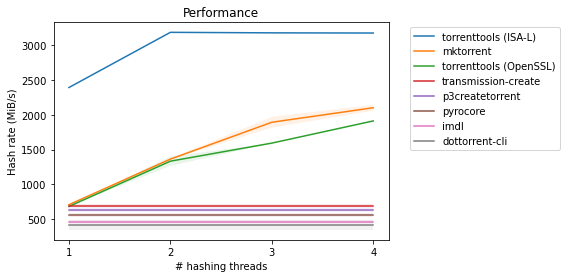

In [48]:
import matplotlib.cm
fig, ax = plt.subplots(1, 1)

programs = df.index.unique(level=1)
threads = df.index.unique(level=0)
programs_by_max_speed = {}

for program in programs:
    sm = df.loc[df.index.get_level_values(1) == program, "speed_mean"]
    programs_by_max_speed[program] = np.max(sm)

sorted_programs = sorted(programs_by_max_speed.keys(), key=lambda x : programs_by_max_speed[x], reverse=True)

for idx, program in enumerate(sorted_programs):
    sm = df.loc[df.index.get_level_values(1) == program, "speed_mean"]
    sd = df.loc[df.index.get_level_values(1) == program, "speed_stddev"]
    ax.plot(threads, sm)
    ax.fill_between(threads, sm - sd, sm + sd, alpha=0.1)

ax.set_title("Performance")
ax.set_xlabel("# hashing threads")
ax.set_ylabel("Hash rate (MiB/s)")
ax.set_xticks(list(range(1, max_threads+1)))
ax.legend(sorted_programs, bbox_to_anchor=(1.05, 1), loc='upper left')